## Notebook contém código para extrair e combinar df de diferentes arquivos

In [220]:
import os
import numpy as np
import pandas as pd
import unicodedata, re
import matplotlib.pyplot as plt


In [233]:
def load_data(name):
    tmp = pd.read_csv(name)
    tmp.rename(columns={'Name': 'name',
                           'Price': 'price',
                           'Brand': 'brand',
                           'Category': 'category'}, inplace=True)
    tmp = tmp[['name', 'price', 'category', 'brand']]
    tmp.dropna(inplace=True)

    return tmp

In [234]:
files = ["df_nondim.csv", "df.csv", "tupan_0x0.csv",
         "tupan_0x1.csv", "tupan_0x2.csv", "tupan_0x3.csv"]
df = pd.DataFrame(columns=['name', 'price', 'category', 'brand'])
for file in files:
    df = pd.concat([df, load_data(file)],
                   ignore_index=True)
df.drop_duplicates(subset=["name", 'category'], inplace=True)
raw_df = df.copy(deep=True)
print(f"shape: {df.shape}")


/tmp/ipykernel_10425/1217240004.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, load_data(file)],


shape: (13085, 4)


In [215]:
def handle_name_category(row):
    name = unicodedata.normalize('NFD', str(row['name']))
    category = unicodedata.normalize('NFD', str(row['category']))
    name = name.lower()
    category = category.lower()

    name = re.sub(r',', '.', name)
    name = re.sub(r'[></-]', '', name)
    category = re.sub(r'[0-9.,>/-]', '', category)
    name = re.sub(r'\s*/?\s*ref\.\s*\w+', '', name, flags=re.IGNORECASE)

    name = ''.join([char for char in name if not unicodedata.combining(char)])
    category = ''.join([char for char in category if not unicodedata.combining(char)])

    words = category.split()
    unique_words = []
    [unique_words.append(word)
      for word in words if word not in unique_words]
    unique_category = " ".join(unique_words)
    row["name"] = name
    row["category"] = unique_category.upper()
    row["features"] = row["name"] + " SEP " + unique_category
    return row

df = df.apply(handle_name_category, axis=1)
df = df.drop_duplicates(subset=["name"])
print(f"shape: {df.shape}")
df.head(5)

shape: (12946, 6)


,name,price,category,brand,features,label
0,telha ecologica classica fit 200x75cm vermelho...,85.9,TELHAS DE FIBRA VEGETAL,ONDULINE,telha ecologica classica fit 200x75cm vermelho...,0
1,pneu 325 aro 8 com 2 lonas leve colson,32.9,MAQUINAS PARA CONSTRUCAO CARRO DE MAO,COLSON,pneu 325 aro 8 com 2 lonas leve colson SEP maq...,1
2,caixa para massa de plastico 20 litros reforca...,24.9,ACESSORIOS PARA CONSTRUCAO DE USO GERAL,DIMAX BR,caixa para massa de plastico 20 litros reforca...,2
3,esquadro em aco 14 polegadas x35.5cm com cabo ...,18.9,ACESSORIOS PARA CONSTRUCAO DE USO GERAL,DIMAX BR,esquadro em aco 14 polegadas x35.5cm com cabo ...,2
4,esquadro em aco 12 polegadas x30.4cm com cabo ...,17.9,ACESSORIOS PARA CONSTRUCAO DE USO GERAL,DIMAX BR,esquadro em aco 12 polegadas x30.4cm com cabo ...,2


In [228]:
df["label"] = pd.factorize(df["category"])[0]
by_label = df["category"].value_counts()

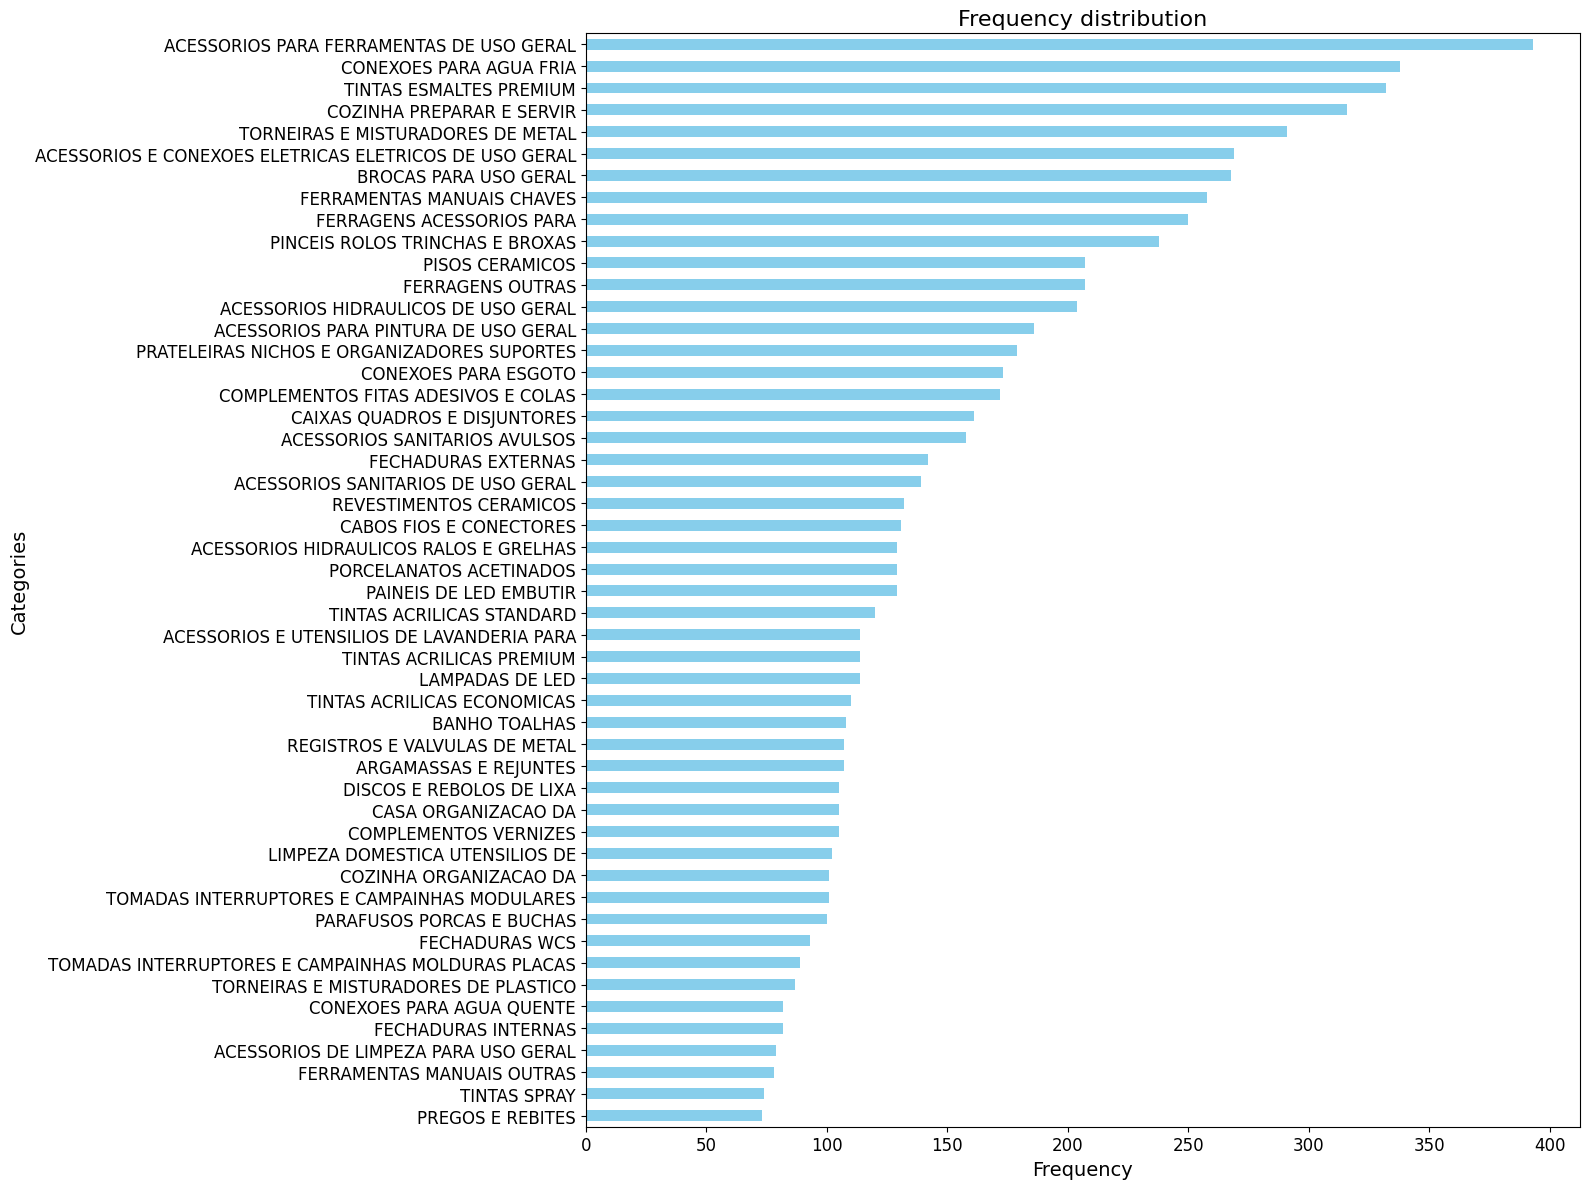

In [231]:
plt.figure(figsize=(16, 12))
by_label[:50].plot(kind='barh', color='skyblue', legend=False)
plt.title('Frequency distribution', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Categories', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
raw_df["label"] = df["label"].astype(int)
raw_df["category"] = df["category"]
raw_df.head()